### Natural Language Processing - Exploratory Data Analysis
In order to understand what needs to be done to analyse text for a BI document, we will examine just one (1) document and take it to be indicative of the entire library of BI corpra.

The first thing to do is import the `nltk` library, which is a native library in python for dealing with text. The following steps will be undertaken, in sequence.

1. Tokenize: This step converts large the entire entry of text (which is currently a large block) into words. A "token" comprises of the smallest unit which constructs sentences, paragraphs and so on.
2. Unfortunately, the above step results in a ton of completely useless tokens such as punctuation and other non-useful data. This step removes all punctuation from the data.
3. Remove common stop words.
4. Examine Frequency distribution.
5. Convert all text to lowercase, rexamine Frequency distribution.

In [1]:
import os

directory = r'/Users/saifbhatti/Desktop/Northwestern/sy1920/w20/iems308/iems308-saifbhatti/homew3/data' #directory to search for data
filenames = [] #new list to hold filenames
dates = [] #new list to hold date keys

#traverse directory and import all relevant data
for filename in os.listdir(directory):
    if filename.endswith(".txt"): #just double check correct filetype
        url = os.path.join(directory,filename)
        dates.append(filename.strip('.txt'))
        filenames.append(url)
    else: continue        

In [2]:
filenames.sort() #organise into date order
filenames[:3]

['/Users/saifbhatti/Desktop/Northwestern/sy1920/w20/iems308/iems308-saifbhatti/homew3/data/2013-01-01.txt',
 '/Users/saifbhatti/Desktop/Northwestern/sy1920/w20/iems308/iems308-saifbhatti/homew3/data/2013-01-02.txt',
 '/Users/saifbhatti/Desktop/Northwestern/sy1920/w20/iems308/iems308-saifbhatti/homew3/data/2013-01-03.txt']

In [3]:
%%time
import string
printable = set(string.printable)

content = []
for filename in filenames:
    with open(filename,encoding='utf8',errors='ignore') as f:
        document = f.read()
        document = ''.join(filter(lambda x: x in printable, document))
        document = document.replace('\n', ' ')
        content.append(document)
f.close()        

CPU times: user 10.1 s, sys: 578 ms, total: 10.7 s
Wall time: 11.1 s


In [4]:
import nltk, string, re, random
random.seed(26328)

In [5]:
val = random.randrange(0,len(content))
indicator_text = content[val] #snag random text

In [6]:
#tokenize text
tokenized_text=indicator_text.split()
print(tokenized_text[:25])

['NEW', 'YORK', '(Reuters)', '-', 'The', 'Federal', 'Reserve', 'is', 'likely', 'to', 'begin', 'shrinking', 'the', 'size', 'of', 'its', 'debt', 'purchase', 'program,', 'intended', 'to', 'prop', 'up', 'economic', 'growth']


In [7]:
# #remove punctuation 
clean_tokens=[]
for token in tokenized_text:
    clean_tokens.append(re.sub(r'[^\w\s]','',token))
    
clean_tokens = list(filter(None, clean_tokens)) #remove any empty strings abound
print(clean_tokens[:25])

['NEW', 'YORK', 'Reuters', 'The', 'Federal', 'Reserve', 'is', 'likely', 'to', 'begin', 'shrinking', 'the', 'size', 'of', 'its', 'debt', 'purchase', 'program', 'intended', 'to', 'prop', 'up', 'economic', 'growth', 'and']


In [8]:
from nltk.probability import FreqDist
fdist = FreqDist(clean_tokens)
fdist.most_common(5)

[('the', 222), ('of', 138), ('to', 98), ('a', 95), ('and', 73)]

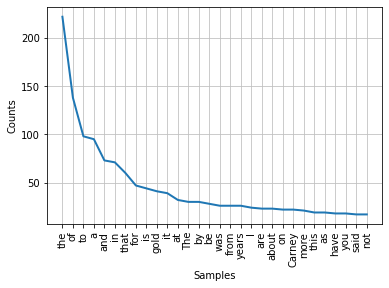

In [9]:
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

As we can see above, there's a ton of nonsensical words that occur frequently. There are the stopwords that will be removed below.

In [10]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))

#remove stopwords
filtered_tokens=[]
for w in clean_tokens:
    if w not in stop_words:
        filtered_tokens.append(w)
print(filtered_tokens[:25])

['NEW', 'YORK', 'Reuters', 'The', 'Federal', 'Reserve', 'likely', 'begin', 'shrinking', 'size', 'debt', 'purchase', 'program', 'intended', 'prop', 'economic', 'growth', 'support', 'labor', 'market', 'September', 'year', 'according', 'majority', 'economists']


In [11]:
fdist = FreqDist(filtered_tokens)
fdist.most_common(5)

[('gold', 41), ('The', 30), ('years', 26), ('I', 24), ('Carney', 22)]

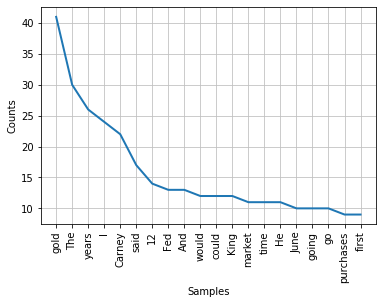

In [12]:
fdist.plot(20,cumulative=False)
plt.show()

In [13]:
lower_tokens=[x.lower() for x in filtered_tokens]

#remove stopwords
lowerclean_tokens=[]
for w in lower_tokens:
    if w not in stop_words:
        lowerclean_tokens.append(w)

In [14]:
fdist = FreqDist(lowerclean_tokens)
fdist.most_common(5)

[('gold', 48), ('years', 26), ('carney', 22), ('said', 17), ('12', 14)]

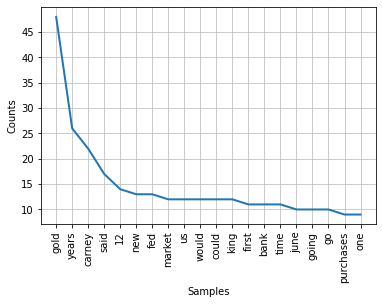

In [15]:
fdist.plot(20,cumulative=False)
plt.show()

In [16]:
#Lexicon Normalization
#performing lemmatization
import re

from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

lemmed_tokens=[]
for l in lowerclean_tokens:
    lemmed_tokens.append(lem.lemmatize(l,'v'))
print(lemmed_tokens[:25])

['new', 'york', 'reuters', 'federal', 'reserve', 'likely', 'begin', 'shrink', 'size', 'debt', 'purchase', 'program', 'intend', 'prop', 'economic', 'growth', 'support', 'labor', 'market', 'september', 'year', 'accord', 'majority', 'economists', 'large']


[('gold', 48), ('years', 26), ('carney', 22), ('said', 17), ('12', 14)]


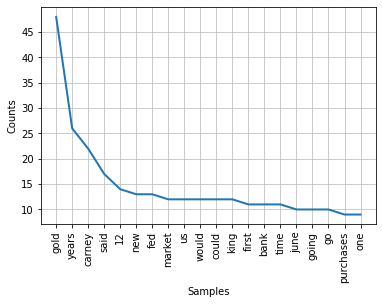

In [17]:
fdist = FreqDist(lowerclean_tokens)
print(fdist.most_common(5))
fdist.plot(20,cumulative=False)
plt.show()

EDA concluded, return to the `main.ipnyb`!